<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/MReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariable linear regression

Multivariate Linear Regression is a statistical modeling technique used to analyze the relationship between multiple independent variables (also called predictors or features) and a single dependent variable. It extends the concept of simple linear regression, which deals with only one independent variable.

In multivariate linear regression, the goal is to find the best-fitting linear equation that represents the relationship between the independent variables and the dependent variable. The equation can be expressed as:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_px_p + \epsilon$

where:
- $y$ is the dependent variable.
- $\beta_0$ is the y-intercept or the constant term.
- $x_1, x_2, \ldots, x_p$ are the independent variables.
- $\beta_1, \beta_2, \ldots, \beta_p$ are the coefficients (regression weights) representing the effect of each independent variable on the dependent variable.
- $\epsilon$ is the error term or residual, which represents the unexplained variation in the dependent variable.

The coefficients $\beta_0, \beta_1, \ldots, \beta_p$ are estimated using a method called Ordinary Least Squares (OLS). The goal of OLS is to minimize the sum of squared residuals, which is the difference between the actual dependent variable values and the predicted values based on the linear equation.

The estimation of the coefficients involves solving a set of equations that minimize the sum of squared residuals. This can be done using matrix algebra techniques, such as the normal equation or matrix inversion.

To assess the overall fit of the multivariate linear regression model, various statistical measures can be used, including the coefficient of determination (R-squared), adjusted R-squared, F-statistic, and p-values associated with the coefficients. These measures help determine the proportion of the dependent variable's variability explained by the model and the statistical significance of the independent variables.

### Normal equations and the Ordinary Least Squares (OLS)
Linear regression can be related to the normal equations, which provide a closed-form solution for finding the optimal values of the regression coefficients. The normal equations are derived from the principle of minimizing the sum of squared residuals (also known as the Ordinary Least Squares method).

Let's consider the case of simple linear regression with one predictor variable. The relationship between the predictor variable ($x$) and the response variable ($y$) can be represented by the equation:
$
 y = \beta_0 + \beta_1x + \epsilon
$

where $\beta_0$ is the intercept, $\beta_1$ is the slope coefficient, and $\epsilon$ is the error term.

The goal of linear regression is to estimate the values of $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals:

$ \text{minimize} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2 $

To find the optimal values of $\beta_0$ and $\beta_1$, we differentiate the sum of squared residuals with respect to each coefficient and set the derivatives equal to zero. This leads to the normal equations:

$ \sum_{i=1}^{n} y_i = n\beta_0 + \beta_1\sum_{i=1}^{n} x_i $

$ \sum_{i=1}^{n} x_iy_i = \beta_0\sum_{i=1}^{n} x_i + \beta_1\sum_{i=1}^{n} x_i^2 $

These equations represent a system of linear equations that can be solved to obtain the estimates of $\beta_0$ and $\beta_1$.

For multiple linear regression with $K$ predictor variables, the normal equations can be extended to a matrix form:

$ \mathbf{X}^T\mathbf{X}\mathbf{b} = \mathbf{X}^T\mathbf{y} $

where $\mathbf{X}$ is the design matrix containing the predictor variables, $\mathbf{y}$ is the response variable vector, and $\mathbf{b}$ is the coefficient vector to be estimated.

By solving the normal equations, we can obtain the estimates of the regression coefficients, which represent the best-fitting line or hyperplane that minimizes the sum of squared residuals.

The normal equations provide a closed-form solution for linear regression, but in practice, other methods such as gradient descent or matrix factorization techniques may be used for computational efficiency or when dealing with large datasets.





# Using python for OLS

Besides numpy and matplotlib, we will use the [statmodels](https://www.statsmodels.org/stable/index.html) library to perform the regression and [itertools](https://docs.python.org/3/library/itertools.html) to generate a dataset.



In [47]:
# import libraries
import statsmodels.api as sm
import numpy as np
import itertools as iter
import matplotlib.pyplot as plt

# Generate a set of predictor variables
span = np.linspace(0, 10, 10)
x=list(iter.combinations_with_replacement(span,2))
x=np.array(x)

# Generate the corresponding responce variables
y = 3 * x[:,0]  + 0.1 * x[:,1]**2 + np.random.randn(len(x[:,1])) * 5

# Perform least square fit
est = sm.OLS(y,x).fit()
print(est.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              333.3
Date:                Tue, 05 Sep 2023   Prob (F-statistic):                    9.55e-31
Time:                        08:07:00   Log-Likelihood:                         -166.88
No. Observations:                  55   AIC:                                      337.8
Df Residuals:                      53   BIC:                                      341.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Explore the data synthesis and outcome!** We should be able to understand the following related to least-squares-fitting:

- R-squared
- (F-statistic)
- coef
- std err
- t
- P>|t|

# Validation
Ok, we have looked at the number, let's visually inspect the outcome (and produce figure for our report)


Text(0, 0.5, 'Predicted y-value')

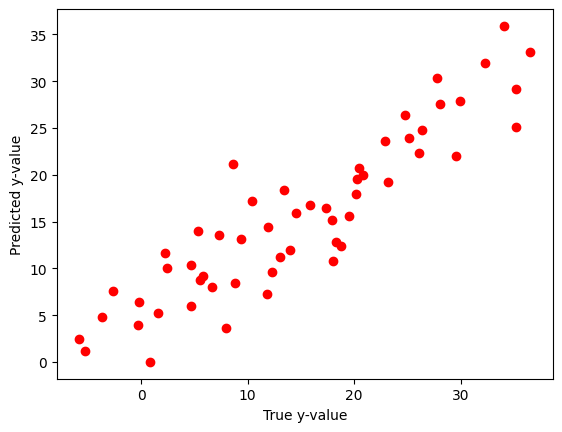

In [48]:
y_pred=est.predict(x)  # use fitted function to compyte y.
plt.scatter(y, y_pred, color='red')

plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")

# Using seaborn

A nicer and more automatic way to plot the result is to usae seaborn, we can plot the data and simultanesouly perform a regression using [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)


<Axes: xlabel='True y-value', ylabel='Predicted y-value'>

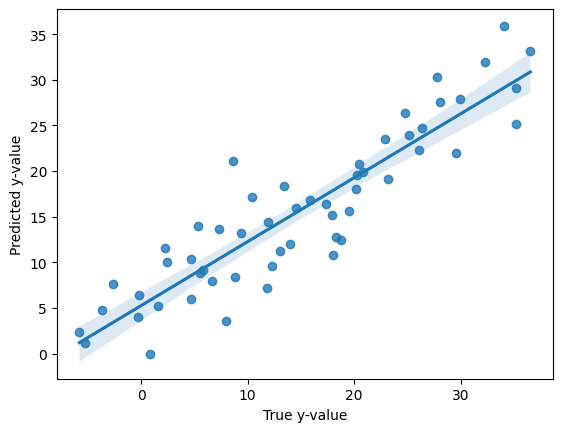

In [49]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'Predicted y-value':y_pred, 'True y-value':y})

sns.regplot(x='True y-value', y='Predicted y-value', data=df)

A common way to illustrate the errors is to use [residplot](https://seaborn.pydata.org/generated/seaborn.residplot.html)

Can you find other ways to plot the data?

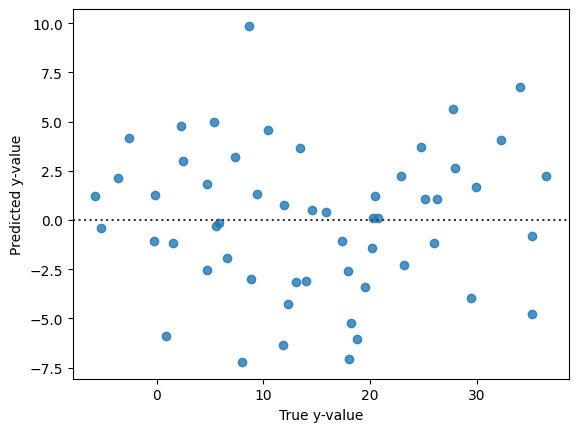

In [50]:
sns.residplot(x='True y-value', y='Predicted y-value',data=df);


[jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) gives us additional information of the distribution of datapoints:

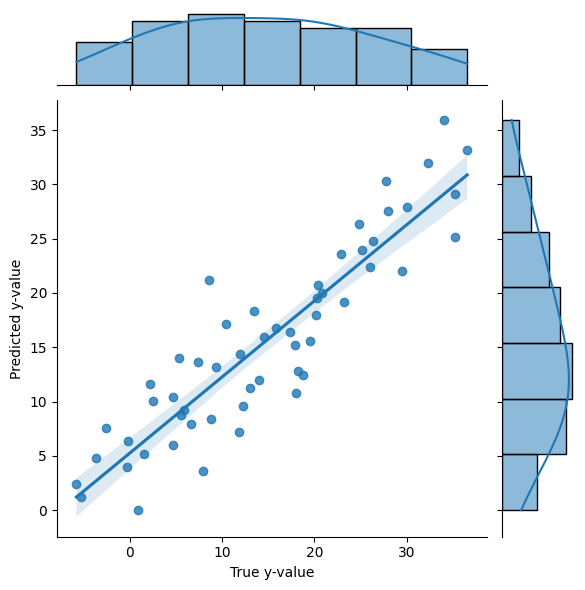

In [51]:
sns.jointplot(x='True y-value', y='Predicted y-value',data=df, kind='reg')  # kind options: 'kde', 'reg', 'hist', 'hex'


When you have a lot of data, it is sometimes difficult to see... Change kind to improve visibility.

# Extra tasks  
1. Change the number of data points in your data set. How does that affect your model?

2. Change the number of independent variables. Don't forget to modify your response function accordingly.How does that change you model?

